<a href="https://colab.research.google.com/github/Tharusha-Sihan/BSP-Paper-Implementation/blob/main/EEMD/EEMD_ReducedFeature_svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, recall_score, confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer

In [3]:
# Load the datasets
train_data = pd.read_csv('/content/drive/MyDrive/BSP Paper Implementation/CSVs/Final Report/cleaned_train_df(EEMD).csv')
test_data = pd.read_csv('/content/drive/MyDrive/BSP Paper Implementation/CSVs/Final Report/cleaned_test_df(EEMD).csv')

In [4]:
print(train_data.shape)
train_data.head()

(9985, 29)


,SV 1,CV 1,SEN 1,BP 1,SV 2,CV 2,SEN 2,BP 2,SV 3,CV 3,...,BP 5,SV 6,CV 6,SEN 6,BP 6,SV 7,CV 7,SEN 7,BP 7,Class
0,2.065795,301.466264,21.580267,1.552360,0.022715,4980.135609,252.076366,211.808314,0.135174,2646.495402,...,212.813785,0.078922,3.963838,110.736903,40.875539,0.001027,237.195322,33.283637,3.692668,0.0
1,2.021937,2590.045129,28.129767,2.637613,0.015745,2341.547892,324.702388,351.438803,0.017103,4352.417956,...,412.221076,0.077988,107.439628,86.313095,24.833168,0.005476,11.411641,118.062541,46.462546,0.0
2,2.202044,2023.948185,26.177846,2.284265,0.049915,1155.755538,323.443480,348.718948,0.209030,1791.627349,...,360.333525,0.016895,154.306674,327.191816,356.848282,0.005677,47.632597,249.004487,206.677448,0.0
3,2.181224,402.054787,15.397074,0.790233,0.188117,2608.281043,120.411811,48.330014,0.061568,56167.364490,...,262.942521,0.032870,20.311520,199.860340,133.147185,0.006725,48.613362,216.249441,155.879402,0.0
4,2.300859,7249.859918,15.957499,0.848806,0.155220,5116.582344,130.716499,56.956011,0.110249,442.863758,...,176.985373,0.030695,9.830494,231.622924,178.830596,0.005196,8.304477,134.717771,60.496259,0.0


In [5]:
print(test_data.shape)
test_data.head()

(2498, 29)


,SV 1,CV 1,SEN 1,BP 1,SV 2,CV 2,SEN 2,BP 2,SV 3,CV 3,...,BP 5,SV 6,CV 6,SEN 6,BP 6,SV 7,CV 7,SEN 7,BP 7,Class
0,2.030810,4357.007014,21.487910,1.539101,0.026126,100845.991112,226.882456,171.585496,0.052606,18388.159078,...,152.384768,0.066841,5282.970310,147.514125,72.534723,0.010913,41.326982,107.856620,38.776835,0.0
1,1.965878,3467.104423,34.421715,3.949515,0.025298,204305.688636,422.313092,594.494491,0.070066,101164.083909,...,189.512362,0.061212,42.194350,152.643822,77.667121,0.005256,1.463766,91.705143,28.032777,0.0
2,2.270942,49809.218560,20.802096,1.442424,0.140740,298980.913420,124.344470,51.538490,0.038741,467.687150,...,373.347029,0.065187,51.273280,156.444010,81.582428,0.008023,0.791179,101.469260,34.320036,0.0
3,1.852784,8772.273133,39.750549,5.267020,0.131204,20354.137606,230.681955,177.380548,0.054758,870163.182305,...,1102.648927,0.047142,35.407146,522.385420,909.621756,0.015308,5.120347,304.132528,308.321982,0.0
4,2.110213,558.560039,15.510513,0.801920,0.100777,6189.769730,133.520187,59.425468,0.117566,1391.438951,...,188.349216,0.039604,22.607302,180.036711,108.044058,0.004808,60.895364,231.958837,179.349674,0.0


In [6]:
# Calculate Pearson's correlation coefficients between Class and each feature
correlation_with_class = train_data.corr(method='pearson')['Class'].drop('Class')

# Sort correlations by their absolute value
sorted_correlation = correlation_with_class.abs().sort_values(ascending=False)

# Display the results
print(sorted_correlation)

SEN 5    0.404501
BP 5     0.390768
SEN 4    0.362658
BP 4     0.325542
BP 6     0.276684
SEN 6    0.256848
BP 1     0.247206
SV 4     0.243738
SV 2     0.242462
SEN 2    0.216333
SEN 1    0.212117
BP 2     0.170720
BP 7     0.157855
SV 3     0.145587
SEN 7    0.112963
BP 3     0.104094
SV 7     0.088970
SV 5     0.074207
SEN 3    0.073278
SV 1     0.054083
CV 7     0.022047
CV 2     0.013474
SV 6     0.010121
CV 5     0.009087
CV 1     0.007099
CV 3     0.005749
CV 6     0.004501
CV 4     0.000012
Name: Class, dtype: float64


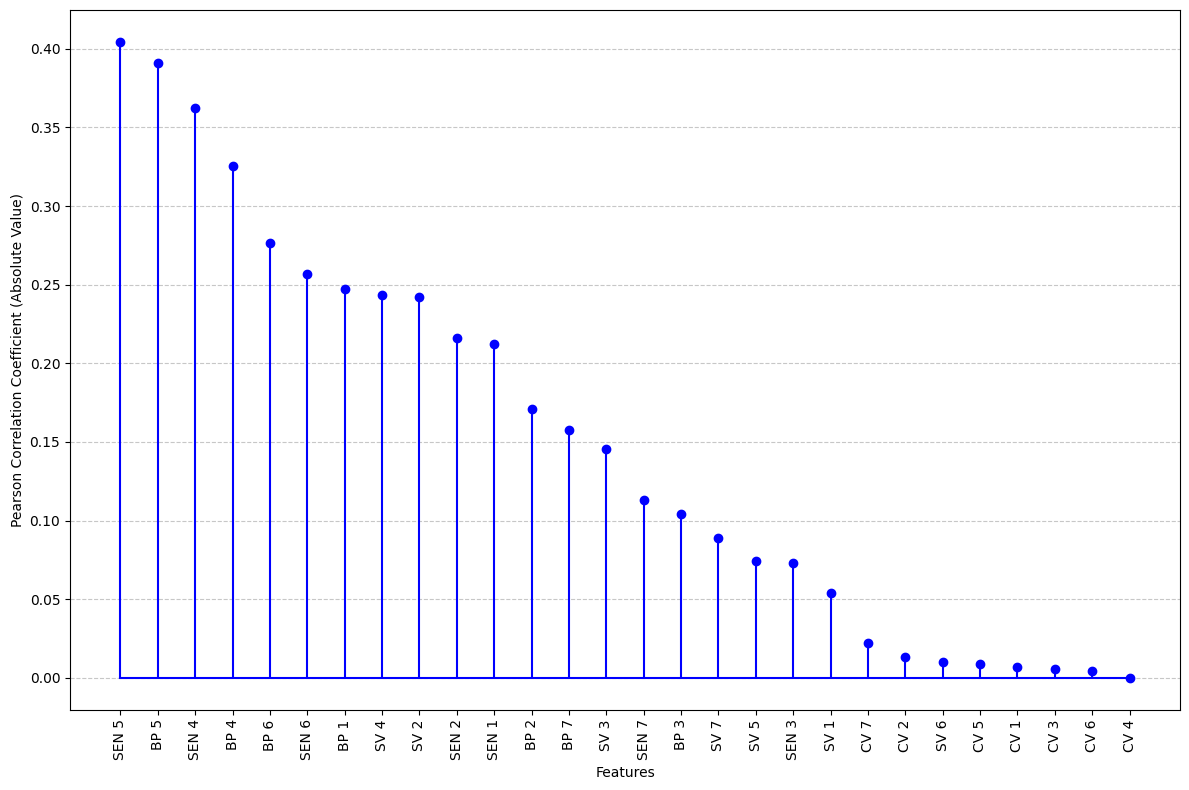

In [7]:
# Prepare data for the stem plot
features = sorted_correlation.index
correlation_values = sorted_correlation.values

# Correcting the issue by removing the `use_line_collection` argument
plt.figure(figsize=(12, 8))
plt.stem(features, correlation_values, markerfmt='bo', basefmt="b-", linefmt='b-')
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Pearson Correlation Coefficient (Absolute Value)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the corrected plot
plt.show()

In [8]:
# Create an array of feature names ordered by descending correlation
labels_order = sorted_correlation.index.to_list()
labels_order.append('Class')

print(labels_order)

['SEN 5', 'BP 5', 'SEN 4', 'BP 4', 'BP 6', 'SEN 6', 'BP 1', 'SV 4', 'SV 2', 'SEN 2', 'SEN 1', 'BP 2', 'BP 7', 'SV 3', 'SEN 7', 'BP 3', 'SV 7', 'SV 5', 'SEN 3', 'SV 1', 'CV 7', 'CV 2', 'SV 6', 'CV 5', 'CV 1', 'CV 3', 'CV 6', 'CV 4', 'Class']


In [9]:
train_data_reordered = train_data[labels_order]
test_data_reordered = test_data[labels_order]

In [10]:
print(train_data_reordered.shape)
train_data_reordered.head()

(9985, 29)


,SEN 5,BP 5,SEN 4,BP 4,BP 6,SEN 6,BP 1,SV 4,SV 2,SEN 2,...,SV 1,CV 7,CV 2,SV 6,CV 5,CV 1,CV 3,CV 6,CV 4,Class
0,252.673971,212.813785,305.955242,312.028700,40.875539,110.736903,1.552360,0.305525,0.022715,252.076366,...,2.065795,237.195322,4980.135609,0.078922,12876.696646,301.466264,2646.495402,3.963838,16458.629501,0.0
1,351.662228,412.221076,307.680972,315.558601,24.833168,86.313095,2.637613,0.130934,0.015745,324.702388,...,2.021937,11.411641,2341.547892,0.077988,37099.995586,2590.045129,4352.417956,107.439628,829.654100,0.0
2,328.785732,360.333525,222.424388,164.908694,356.848282,327.191816,2.284265,0.254729,0.049915,323.443480,...,2.202044,47.632597,1155.755538,0.016895,52.161397,2023.948185,1791.627349,154.306674,16122.201121,0.0
3,280.860742,262.942521,212.769958,150.903516,133.147185,199.860340,0.790233,0.226345,0.188117,120.411811,...,2.181224,48.613362,2608.281043,0.032870,51425.819609,402.054787,56167.364490,20.311520,393.543310,0.0
4,230.424851,176.985373,174.155884,101.100907,178.830596,231.622924,0.848806,0.238365,0.155220,130.716499,...,2.300859,8.304477,5116.582344,0.030695,322.220230,7249.859918,442.863758,9.830494,1062.099430,0.0


In [11]:
print(test_data_reordered.shape)
test_data_reordered.head()

(2498, 29)


,SEN 5,BP 5,SEN 4,BP 4,BP 6,SEN 6,BP 1,SV 4,SV 2,SEN 2,...,SV 1,CV 7,CV 2,SV 6,CV 5,CV 1,CV 3,CV 6,CV 4,Class
0,213.811671,152.384768,268.494518,240.297688,72.534723,147.514125,1.539101,0.074600,0.026126,226.882456,...,2.030810,41.326982,100845.991112,0.066841,370.407174,4357.007014,18388.159078,5282.970310,5089.618166,0.0
1,238.440157,189.512362,290.033636,280.398366,77.667121,152.643822,3.949515,0.121812,0.025298,422.313092,...,1.965878,1.463766,204305.688636,0.061212,401.234304,3467.104423,101164.083909,42.194350,809.594147,0.0
2,334.670149,373.347029,338.853764,382.739579,81.582428,156.444010,1.442424,0.110389,0.140740,124.344470,...,2.270942,0.791179,298980.913420,0.065187,116.566359,49809.218560,467.687150,51.273280,120.803682,0.0
3,575.147527,1102.648927,439.656235,644.325351,909.621756,522.385420,5.267020,0.134415,0.131204,230.681955,...,1.852784,5.120347,20354.137606,0.047142,103.830812,8772.273133,870163.182305,35.407146,407.275085,0.0
4,237.707309,188.349216,200.173323,133.564531,108.044058,180.036711,0.801920,0.312447,0.100777,133.520187,...,2.110213,60.895364,6189.769730,0.039604,276.647625,558.560039,1391.438951,22.607302,2077.801331,0.0


In [12]:
# Separate features and labels
X_train_full = train_data_reordered.drop(columns=["Class"])  # all columns except the "Class"
y_train = train_data["Class"]  # "Class" column

X_test_full = test_data_reordered.drop(columns=["Class"])  # all columns except the "Class"
y_test = test_data["Class"]  # "Class" column

# Normalize the entire dataset
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)

# Initialize an array to store accuracy values
accuracy_values = []

In [13]:
# Incrementally train and test the SVM classifier
for i in range(1, X_train_scaled.shape[1] + 1):
    # Select the first i features from the pre-scaled datasets
    X_train = X_train_scaled[:, :i]
    X_test = X_test_scaled[:, :i]

    # Initialize and train the SVM classifier
    svm = SVC(kernel='rbf', C=46.42)
    svm.fit(X_train, y_train)

    # Predict on the test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy and store it
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    # Print progress
    print(f"Finished training and testing with {i} features. Accuracy: {accuracy:.4f}")

Finished training and testing with 1 features. Accuracy: 0.5320
Finished training and testing with 2 features. Accuracy: 0.5312
Finished training and testing with 3 features. Accuracy: 0.6513
Finished training and testing with 4 features. Accuracy: 0.6541
Finished training and testing with 5 features. Accuracy: 0.7086
Finished training and testing with 6 features. Accuracy: 0.7146
Finished training and testing with 7 features. Accuracy: 0.7930
Finished training and testing with 8 features. Accuracy: 0.8551
Finished training and testing with 9 features. Accuracy: 0.8723
Finished training and testing with 10 features. Accuracy: 0.8955
Finished training and testing with 11 features. Accuracy: 0.8971
Finished training and testing with 12 features. Accuracy: 0.8991
Finished training and testing with 13 features. Accuracy: 0.9083
Finished training and testing with 14 features. Accuracy: 0.9147
Finished training and testing with 15 features. Accuracy: 0.9279
Finished training and testing with

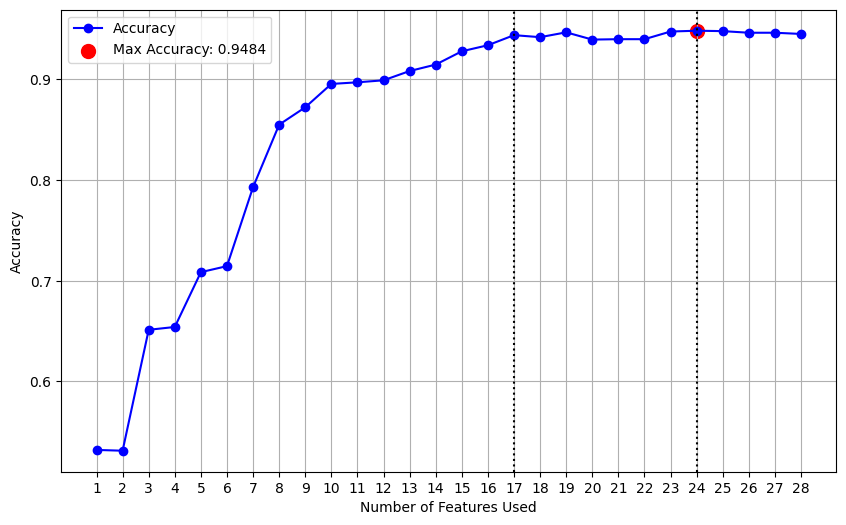

In [14]:
# Find the maximum accuracy and its corresponding feature count
max_accuracy = max(accuracy_values)
max_feature_count = accuracy_values.index(max_accuracy) + 1  # Adjust for zero-based index

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_values) + 1), accuracy_values, marker='o', linestyle='-', color='b', label="Accuracy")
plt.xlabel('Number of Features Used')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(1, len(accuracy_values) + 1))  # Ensures x-axis matches number of features

# Highlight the maximum point
plt.scatter(max_feature_count, max_accuracy, color='red', s=100, label=f"Max Accuracy: {max_accuracy:.4f}")
plt.axvline(x=max_feature_count, color='black', linestyle='dotted')
plt.axvline(x=17, color='black', linestyle='dotted')

# Add legend
plt.legend()

# Show plot
plt.show()

In [18]:
# Create the SVM model with a cubic kernel
svm_optimal = SVC(kernel='rbf', C=46.42)

# Train the model
svm_optimal.fit(X_train_scaled, y_train)

SVC(C=46.42)

In [19]:
# Dataset and labels to make predictions and compare
model_pred = X_test_scaled
real_labels = y_test

# Optionally, evaluate the model on the "model_pred" data
y_pred = svm_optimal.predict(model_pred)

In [20]:
# Print the evaluation metrics
print("Accuracy on Test Data: ", accuracy_score(real_labels, y_pred))
print("Classification Report:\n", classification_report(real_labels, y_pred))

Accuracy on Test Data:  0.94515612489992
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.90      0.89       500
         1.0       0.98      0.99      0.99       500
         2.0       0.97      0.99      0.98       500
         3.0       0.93      0.89      0.91       500
         4.0       0.96      0.95      0.96       498

    accuracy                           0.95      2498
   macro avg       0.95      0.95      0.94      2498
weighted avg       0.95      0.95      0.94      2498

